In [1]:
import pandas as pd
from pandas import Series, DataFrame
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Q1 [12 points] Classification

Consider the following 2 datasets, each of which has equal numbers of red and blue points.

![both](both.png)

### Q1(a) [4 points] Suppose you can build a decision tree to classify the red points from the blue points. 
You can set the depth anywhere between 1 and 10 (recall that depth 1 means you get to split at most once).
Which depth gives you the best training accuracy for dataset 1? And for dataset 2?
If several choices for depth achieve the highest accuracy, report the smallest depth that achieves that accuracy.

## Answer

A Depth of 4 will give us the best accuracy for Dataset 1 and Dataset 2

### Q1(b) [4 points] What is the accuracy achieved by logistic regression on dataset 1? On dataset 2?

For dataset 2, you may give an approximate answer assuming that the red and blue circles are very very close to each other.

**Fill in**

### Q1(c) [4 points] What accuracy would a K-Nearest Neighbors algorithm achieve on dataset 1? On dataset 2?

You may assume a reasonably large value for K, say, K=20. You can also assume that the points are uniformly spread out over the circles, and for dataset 2, the two circles are very very close to each other.

**Fill in**

---

We will consider a dataset where each row is one active businesses in the Los Angeles area. We care about the following fields:
* BUSINESS NAME, STREET ADDRESS, CITY, ZIP CODE: self-explanatory
* MAILING ADDRESS, MAILING CITY, MAILING ZIP CODE: these correspond to locations where letters addressed to the business need to be mailed
* LOCATION DESCRIPTION: a column that combines the street name and zip code
* NAICS: North American Industry Classification System (essentially the type of business)
* PRIMARY NAICS DESCRIPTION: a description of the NAICS code
* COUNCIL DISTRICT: another location identifier
* LOCATION START DATE: when did the business start using this location.

*Note*: You can assume that STREET ADDRESS has no NaNs. However, **there may be NaNs in all other columns, and your code may need to account for that if necessary!**

### Q2 [3 points] Read in "ActiveBusinesses.csv" and print the first line.

In [4]:
activeBusiness = pd.read_csv("ActiveBusinesses.csv")
activeBusiness.iloc[0]

LOCATION ACCOUNT #                                           0002737837-0001-4
BUSINESS NAME                                            ERDEM ENTERPRISES LLC
DBA NAME                                                                   NaN
STREET ADDRESS                               6177 N LINCOLN AVENUE   UNIT #337
CITY                                                                   CHICAGO
ZIP CODE                                                            60659-2313
LOCATION DESCRIPTION                                        6177 LINCOLN 60659
MAILING ADDRESS                          5805   WHITE OAK AVENUE   UNIT #16999
MAILING CITY                                                            ENCINO
MAILING ZIP CODE                                                    91416-5052
NAICS                                                                 512100.0
PRIMARY NAICS DESCRIPTION    Motion picture & video industries (except vide...
COUNCIL DISTRICT                                    

### Q3 [4 points] Businesses with the same street address.

Find the most frequent STREET ADDRESS (i.e., the STREET ADDRESS that shows up in the most rows). List all the BUSINESS NAMEs at that STREET ADDRESS.

In [9]:
q1 = activeBusiness["STREET ADDRESS"].value_counts().sort_values(ascending=False).idxmax()
print("Most common Street address:",q1)

Most common Street address: 15821 VENTURA BLVD SUITE #370


In [12]:
print("All businesses with address ",q1,":")
print(list(activeBusiness[activeBusiness["STREET ADDRESS"] == q1]["BUSINESS NAME"].values))

All businesses with address  15821 VENTURA BLVD SUITE #370 :
['HYPERSONIC, INC.', 'TWIN ENGINES LLC', 'COMANDANTE, LLC', 'PHILIP CHRISTOPHER HARVEY', 'DIA DE LOS DEFTONES LLC', 'SMOKIN CAMELS CARAVAN INC', 'BVB TOURING, INC.', 'ELLA MAI MUSIC INC', 'EMMIT FENN', 'KIDD KASH INC', 'HOT MILK INC', 'CC BLUE INC']


### Q4 [4 points] Plot the top 10 most frequent BUSINESS NAMEs.
The x-axis should be the BUSINESS NAME, and the y-axis should be the number of rows with that BUSINESS NAME.

<AxesSubplot:>

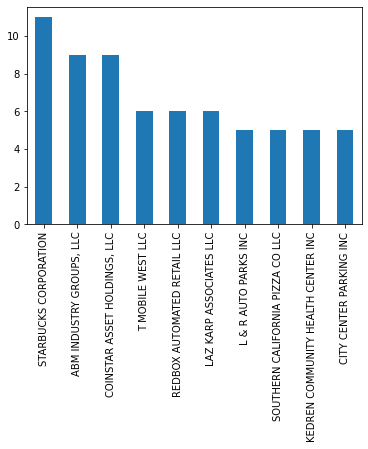

In [15]:
activeBusiness["BUSINESS NAME"].value_counts().sort_values(ascending=False)[:10].plot.bar()

### Q5 [4 points] Top street names

Define the street name as the LOCATION DESCRIPTION without the first word (street number) and the last word (the zip code).
Print the frequencies of the top 10 street names.

In [57]:
activeBusiness["STREET NAME"] = activeBusiness["LOCATION DESCRIPTION"].apply(lambda x: (' '.join((str)(x).split()[1:-1])))
activeBusiness["STREET NAME"].value_counts().sort_values(ascending=False)[:10]

VENTURA         579
WILSHIRE        513
OLYMPIC         157
FIGUEROA        148
SHERMAN         146
SUNSET          145
SANTA MONICA    135
SEPULVEDA       133
PICO            132
WESTERN         128
Name: STREET NAME, dtype: int64

### Q6 [4 points] Plot the frequencies of the top-10 cities except LOS ANGELES.

<AxesSubplot:>

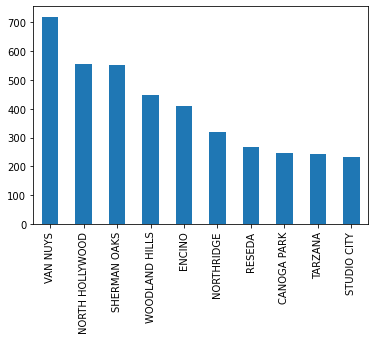

In [32]:
activeBusiness["CITY"].value_counts().sort_values(ascending=False).drop("LOS ANGELES")[:10].plot.bar()

### Q7 [4 points] Among rows where both ZIP CODE and MAILING ZIP CODE are not missing, what fraction of rows have different values for these two columns?

In [56]:
q7 = activeBusiness[activeBusiness["ZIP CODE"].notnull() & activeBusiness["MAILING ZIP CODE"].notnull()][["ZIP CODE","MAILING ZIP CODE"]]
print("Fraction of rows with different ZIP CODE & MAILING ZIP CODE:",q7[q7["ZIP CODE"] != q7["MAILING ZIP CODE"]].shape[0]/q7.shape[0])

Fraction of rows with different ZIP CODE & MAILING ZIP CODE: 0.5952614059134521


### Q8 [4 points] How many unique STREET ADDRESSes have a single character as their second word?

For example, the second word of "1155 N LA CIENEGA BLVD" is "N".

In [73]:
def SecondWordSize(x):
    t = x.split()
    if len(t)<2:
        return False
    else:
        return len(t[1]) == 1

print("Number of Unique Street Addresses: ",activeBusiness[activeBusiness["STREET ADDRESS"].apply(lambda x: (SecondWordSize(x)))]["STREET ADDRESS"].unique().size)

Number of Unique Street Addresses:  5950


### Q9 [4 points] Among rows where NAICS is not missing, what fraction also have PRIMARY NAICS DESCRIPTION also not missing?

In [95]:
print("Fraction of PRIMARY NAICS DESCRIPTION NOT missing:",1 - activeBusiness[activeBusiness["NAICS"].isnull() == False]["PRIMARY NAICS DESCRIPTION"].isnull().mean())

Fraction of PRIMARY NAICS DESCRIPTION NOT missing: 1.0


### Q10 [4 points] Find all unique BUSINESS NAMEs where the CITY in which the business is located is part of the BUSINESS NAME.

For example, "LOS ANGELES VALLEY CAREGIVERS, INC." in the city of LOS ANGELES.

In [114]:
q10 = list(activeBusiness[activeBusiness.apply(lambda row: ( (str)(row["CITY"]) in row["BUSINESS NAME"]),axis = 1)]["BUSINESS NAME"].unique())
print("List of all {} UNIQUE BUSINESS NAME:\n".format(len(q10)), q10)

List of all 112 UNIQUE BUSINESS NAME:
 ['LOS ANGELES DRAMA CLUB', 'RESEDA PHARMACY INC', 'URBAN PARTNERS LOS ANGELES INC', 'SHERMAN OAKS-A, INC', 'ENCINO STARDUST INVESTMENT COMPANY', 'LOS ANGELES PSYCHOANALYTIC SOCIETY & INSTITUTE', 'EL LEON CIGARS DE LOS ANGELES INC', 'ONTARIO CHAMMBER OF COMMERCE', 'GALLAGHER DESIGNS LOS ANGELES', 'VENICE ALE HOUSE LLC', 'KIDS ENJOY EXERCISE NOW (KEEN) LOS ANGELES LLC', 'COTNER LOS ANGELES LLC', 'LOS ANGELES MOBILE TRUCK WASH LLC', 'CANOGA PARK COMMUNITY CENTER', 'VALLEY VILLAGE MANAGEMENT CORPORATION', '1533 N MCCADDEN PLACE LOS ANGELES CA 90028 FAMILY TRUST', 'A A OFICINA CENTRAL HISPANA DE LOS ANGELES /C', 'LOS ANGELES KIDNEY CENTER A PMC', 'TARZANA LOCK AND SAFE INC', 'METROPOLIS LOS ANGELES LLC', 'ONTARIO SUPER 8 INC', 'KOLLEL-LOS ANGELES /C', 'CITY OF LOS ANGELES', 'SPAY NEUTER PROJECT OF LOS ANGELES INC', 'LOS ANGELES SECURITY ACADEMY INC', 'NATIONAL COUNCIL OF JEWISH WOMEN INC/LOS ANGELES SECTION', 'M & B CARPET SUPPLIERS OF TEMPLE CITY INC'

### Q11 [4 points] Print out all cities with 5 or more unique council districts associated with them.

In [120]:
q11 = activeBusiness[["CITY","COUNCIL DISTRICT"]].drop_duplicates().groupby("CITY")["COUNCIL DISTRICT"].size().sort_values(ascending=False)
q11[q11>4]

CITY
LOS ANGELES        13
VAN NUYS            6
SHERMAN OAKS        6
NORTHRIDGE          6
NORTH HOLLYWOOD     5
ENCINO              5
Name: COUNCIL DISTRICT, dtype: int64

### Q12 [6 points] Multiple NAICS
Find all instances where there are several different NAICS for the same PRIMARY NAICS DESCRIPTION. Print out these NAICS and PRIMARY NAICS DESCRIPTIONs.

In [137]:
q12 = activeBusiness[["NAICS","PRIMARY NAICS DESCRIPTION"]].drop_duplicates().groupby("PRIMARY NAICS DESCRIPTION")
multiNAICS = list(q12.size()[q12.size() > 1].index.values)

q12.get_group(multiNAICS[0])

,NAICS,PRIMARY NAICS DESCRIPTION
696,445290.0,Home furnishings stores
919,442200.0,Home furnishings stores


### Q13 [6 points] Plot the frequency of street last-names.

The street last-name is defined as follows:
* Look at a STREET ADDRESS (e.g., "5670 WILSHIRE BLVD #B 1")
* Read its words backwards (here:, "1", "#B", "BLVD", "WILSHIRE", "5670")
* Pick the first word that doesn't have any digits or "#" in it (here: "BLVD")

Calculate the number of rows associated with each unique last-name. Plot the frequencies of the top 10 last-names.

In [150]:
def LastName(inpstr):
    for word in inpstr[::-1].split():
        if not (word.isnumeric() or ("#" in word)):
            return(word[::-1])

LastName("5670 WILSHIRE BLVD #B 1")

'BLVD'

<AxesSubplot:>

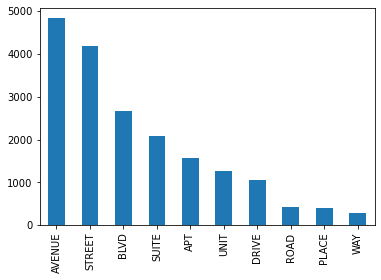

In [155]:
activeBusiness["STREET ADDRESS"].apply(lambda x: (LastName(x))).value_counts().sort_values(ascending=False)[:10].plot.bar()

### Q14 [6 points] Streets with the widest range of street numbers

* Drop all STREET ADDRESSES where the first word is not all numbers. For example, keep the row where the STREET ADDRESS is "15136 STAGG STREET" but drop the row with "POST OFFICE BOX 123".
* Among these STREET ADDRESSES, call the first word STREET NUMBER and the rest of the address STREET BASE.
    * For example, a STREET ADDRESS of "15136 STAGG STREET" has a STREET NUMBER of 15136 and a STREET BASE of "STAGG STREET"
* For each STREET BASE, figure out the range of STREET NUMBERs.
    * For example, if you see "15126 STAGG STREET", "15100 STAGG STREET" and "15200 STAGG STREET", then the range for "STAGG STREET" is 15200-15100=100.
* Print out the top 5 STREET BASEs with the largest range of STREET NUMBERs.

In [207]:
activeBusiness["STREET NUMBER"] = activeBusiness[activeBusiness["STREET ADDRESS"].apply(lambda x: (x.split()[0].isnumeric()))]["STREET ADDRESS"].apply(lambda x: ((int)(x.split()[0])))
activeBusiness["STREET BASE"] = activeBusiness[activeBusiness["STREET ADDRESS"].apply(lambda x: (x.split()[0].isnumeric()))]["STREET ADDRESS"].apply(lambda x: (' '.join(x.split()[1:])))

In [208]:
def Range(inp):
    return max(inp)-min(inp)

In [209]:
activeBusiness.groupby("STREET BASE")["STREET NUMBER"].agg(Range).sort_values(ascending=False)[:5]

STREET BASE
DUNN DRIVE               78397.0
ATLANTIC AVENUE          64710.0
CORPORATE DRIVE          34455.0
PACIFIC COAST HIGHWAY    30010.0
S WESTERN AVENUE         27962.0
Name: STREET NUMBER, dtype: float64

### Q15 [6 points] Among MAILING CITIES that appear at least 50 times, what is the fraction of rows for which the MAILING ADDRESS contains the string "POST OFFICE BOX"?

In [241]:
q15 = set(activeBusiness["MAILING CITY"].value_counts()[activeBusiness["MAILING CITY"].value_counts() >= 50].index)
q15

print("fraction of rows for which the MAILING ADDRESS contains the string 'POST OFFICE BOX':\n",
    activeBusiness[(activeBusiness["MAILING CITY"].apply(lambda x: (x in q15)))]["MAILING ADDRESS"].apply(lambda x: ("POST OFFICE BOX" in str(x))).mean())

fraction of rows for which the MAILING ADDRESS contains the string 'POST OFFICE BOX':
 0.07069261591299371


### Q16 [6 points] Business chains

* Find all BUSINESS NAMEs that are associated with 6 or more unique non-missing LOCATIONs.
* For each such BUSINESS NAME, print out a DataFrame with the index being the BUSINESS NAME and two columns:
    * the number of unique cities in which the business operates, and
    * the CITY with the maximum number of locations for this business (you need not consider unique locations here).

In [304]:
q16 = activeBusiness[["BUSINESS NAME","LOCATION"]].drop_duplicates().dropna(how="any").groupby("BUSINESS NAME").agg("count")
businessChains = set(q16[q16["LOCATION"] >=6].index.values)
businessChains

{'ABM INDUSTRY GROUPS, LLC',
 'COINSTAR ASSET HOLDINGS, LLC',
 'LAZ KARP ASSOCIATES LLC',
 'REDBOX AUTOMATED RETAIL LLC',
 'STARBUCKS CORPORATION',
 'T MOBILE WEST LLC'}

In [305]:
q16_pivot = activeBusiness[activeBusiness["BUSINESS NAME"].apply(lambda x: (x in businessChains))].groupby(["BUSINESS NAME","CITY"]).size().unstack()

q16_pivot

CITY,CANOGA PARK,ENCINO,GRANADA HILLS,LOS ANGELES,NORTH HOLLYWOOD,PACIFIC PALISADES,PORTER RANCH,RESEDA,SAN PEDRO,SHERMAN OAKS,SUN VALLEY,TARZANA,VAN NUYS,WEST HILLS,WILMINGTON
BUSINESS NAME,,,,,,,,,,,,,,,
"ABM INDUSTRY GROUPS, LLC",NaN,1.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
"COINSTAR ASSET HOLDINGS, LLC",NaN,NaN,NaN,2.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,2.0,1.0,1.0
LAZ KARP ASSOCIATES LLC,NaN,1.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
REDBOX AUTOMATED RETAIL LLC,NaN,NaN,1.0,3.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
STARBUCKS CORPORATION,1.0,NaN,1.0,6.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN
T MOBILE WEST LLC,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,1.0,NaN,NaN


In [307]:
q16_answer = DataFrame(index=q16_pivot.index.values)
q16_answer["UNIQUE CITIES"] = q16_pivot.apply(lambda row: (len(row.dropna().index.values)),axis = 1)
q16_answer["MAX CITY"] = q16_pivot.apply(lambda row: (row.idxmax()),axis = 1)
q16_answer

,UNIQUE CITIES,MAX CITY
"ABM INDUSTRY GROUPS, LLC",3,LOS ANGELES
"COINSTAR ASSET HOLDINGS, LLC",7,LOS ANGELES
LAZ KARP ASSOCIATES LLC,2,LOS ANGELES
REDBOX AUTOMATED RETAIL LLC,4,LOS ANGELES
STARBUCKS CORPORATION,6,LOS ANGELES
T MOBILE WEST LLC,6,LOS ANGELES


### Q17 [6 points] Visualize Ventura

* Find all rows where the STREET ADDRESS contains "VENTURA BLVD".
* Look at the LOCATION column for these rows. These are in the form (latitude, longitude)
* Drop any rows where the LOCATION is missing or equals "(0.0, 0.0)"
* Extract the latitudes and longitudes. 
* Show a scatter plot of locations with latitude on the y-axis and longitude on the x-axis. These give a visualization of roads named Ventura Blvd.

In [330]:
def ExtractLatLong(inp):

    if(inp == '(0.0, 0.0)'):
        return np.nan
    
    if(inp != inp ): # Nan != Nan
        return np.nan
    
    lat,long = map(float,inp.replace("(","").replace(")","").replace(" ","").split(","))
    return (lat, long)

# ExtractLatLong("(34.1538, -118.4662)")
# ExtractLatLong("(0.0, 0.0)")

In [336]:
q17 = activeBusiness[activeBusiness["STREET ADDRESS"].apply(lambda x: ("VENTURA BLVD" in x))]["LOCATION"].apply(lambda x: (ExtractLatLong(x))).dropna()
q17.head()

11    (34.1538, -118.4662)
44    (34.1595, -118.5024)
46    (34.1589, -118.4996)
58    (34.1537, -118.4654)
71    (34.1556, -118.4819)
Name: LOCATION, dtype: object

Text(0, 0.5, 'Longitude')

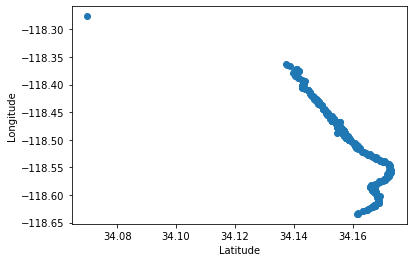

In [341]:
lat = q17.apply(lambda x: x[0])
long = q17.apply(lambda x: x[1])

scatter(lat,long)
xlabel("Latitude")
ylabel("Longitude")

### Q18 [4 points] Plot the total number of rows for each month from 01/01/2000 to 01/01/2021.

---

### Autism Classification

We will consider a dataset where each row is an adult who may be autistic (Class/ASD is YES). We will only need the columns named A1_Score to A10_Score. These are scores achieved on answers to different questions measuring mental acuity. A score of 1 is a correct answer, while 0 is a wrong answer.

In [378]:
df = pd.read_csv('Autism-Adult-Data.arff', skiprows=25, header=None, \
                 names=['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
                        'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
                        'gender', 'ethnicity', 'jaundice', 'austim', 'country_of_res',
                        'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'])
df.iloc[0]

A1_Score                         1
A2_Score                         1
A3_Score                         1
A4_Score                         1
A5_Score                         0
A6_Score                         0
A7_Score                         1
A8_Score                         1
A9_Score                         0
A10_Score                        0
age                             26
gender                           f
ethnicity           White-European
jaundice                        no
austim                          no
country_of_res     'United States'
used_app_before                 no
result                           6
age_desc             '18 and more'
relation                      Self
Class/ASD                       NO
Name: 0, dtype: object

### Q19 [3 points] Create a target column which is 1 if Class/ASD is YES, and 0 otherwise.

Print out the baseline accuracy on this dataset.

In [379]:
df["Target"] = df["Class/ASD"].apply(lambda x: (1 if x == "YES" else 0))
df["Target"].value_counts()
print("Baseline Accuracy is when all predictions are 0:",(df["Target"].value_counts()[0]/len(df)))

Baseline Accuracy is when all predictions are 0: 0.7315340909090909


### Q20 [6 points] Minimum number of questions

Calculate the average cross-validation accuracy for predicting the target using 10 different classifiers. Each classifier is a Nearest Neighbors classifier with K=15 nearest neighbors (all other settings can be set to their defaults), but with different features.
* Classifier 1 uses A1_Score
* Classifier 2 uses A1_Score and A2_Score
* Classifier 3 uses A1_Score, A2_Score, and A3_Score
* ...
* Classifier 10 uses A1_Score, A2_Score, ..., A10_Score

None of the classifiers use any of the other available columns such as age/gender/etc.

Find the maximum cross-validation accuracy among these 10 classifiers.
Then find out which classifiers achieve a cross-validation accuracy that is at least 95% of this maximum.
Among these, print out which classifier uses the fewest features.

In [388]:
from sklearn import neighbors
from sklearn import model_selection
from patsy import dmatrices
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [389]:
def cv_accuracy_score(X, y, nn=15):
    """For each fold, fit the nearest neighbors model
    with nn nearest neighbors on the train, and return accuracy
    on the test."""
    
    model = neighbors.KNeighborsClassifier(n_neighbors=nn,
                                           weights='uniform')
    accuracies = []
    
    kfold = model_selection.StratifiedKFold(n_splits=3, shuffle=True).split(X, y)
    for train, holdout in kfold:
        # Select the training and testing data using the indices
        # provided by kfold
        X_train = X.iloc[train]
        X_holdout = X.iloc[holdout]
        y_train = y[train]
        y_holdout = y[holdout]
        
        # Fit the model
        model.fit(X_train, y_train)
        
        # Compute test accuracy
        accuracy = metrics.accuracy_score(y_holdout, model.predict(X_holdout))
        accuracies.append(accuracy)
    
    average_accuracy = mean(accuracies)
    return average_accuracy


In [403]:

formula = 'Target ~ 0'
scores = []

for x in range(1,11):
    formula = formula + "+A{}_Score".format(x)
    # print(formula)
    Y, X = dmatrices(formula,
                 df,return_type="dataframe")
    y = Y['Target'].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

    scores.append(cv_accuracy_score(X_train,y_train))

scores = DataFrame(scores)
scores

,0
0,0.717480
1,0.717480
2,0.827236
3,0.800813
4,0.888211
5,0.904472
6,0.918699
7,0.957317
8,0.955285
9,0.981707


In [406]:
scores[scores >= scores.quantile(0.95)]

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,0.981707


In [407]:
scores.quantile(0.95)

0    0.970732
Name: 0.95, dtype: float64